In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics==8.0.196


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 4.7 MB/s eta 0:00:00


In [3]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="wmZW9OWbcdJSS5NhCoEj")
project = rf.workspace("fachri-pik8d").project("image-natural")
dataset = project.version(1).download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.5 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Image-Natural-1 in yolov8:: 100%|██████████| 5158/5158 [00:00<00:00, 7889.89it/s]


In [4]:
!pip install -U albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 2.7 MB/s eta 0:00:00


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.78 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Image-Natural-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=Fals

In [7]:
!ls {HOME}/runs/detect/train2/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1723977617.00d7572e52e9.4640.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


/content


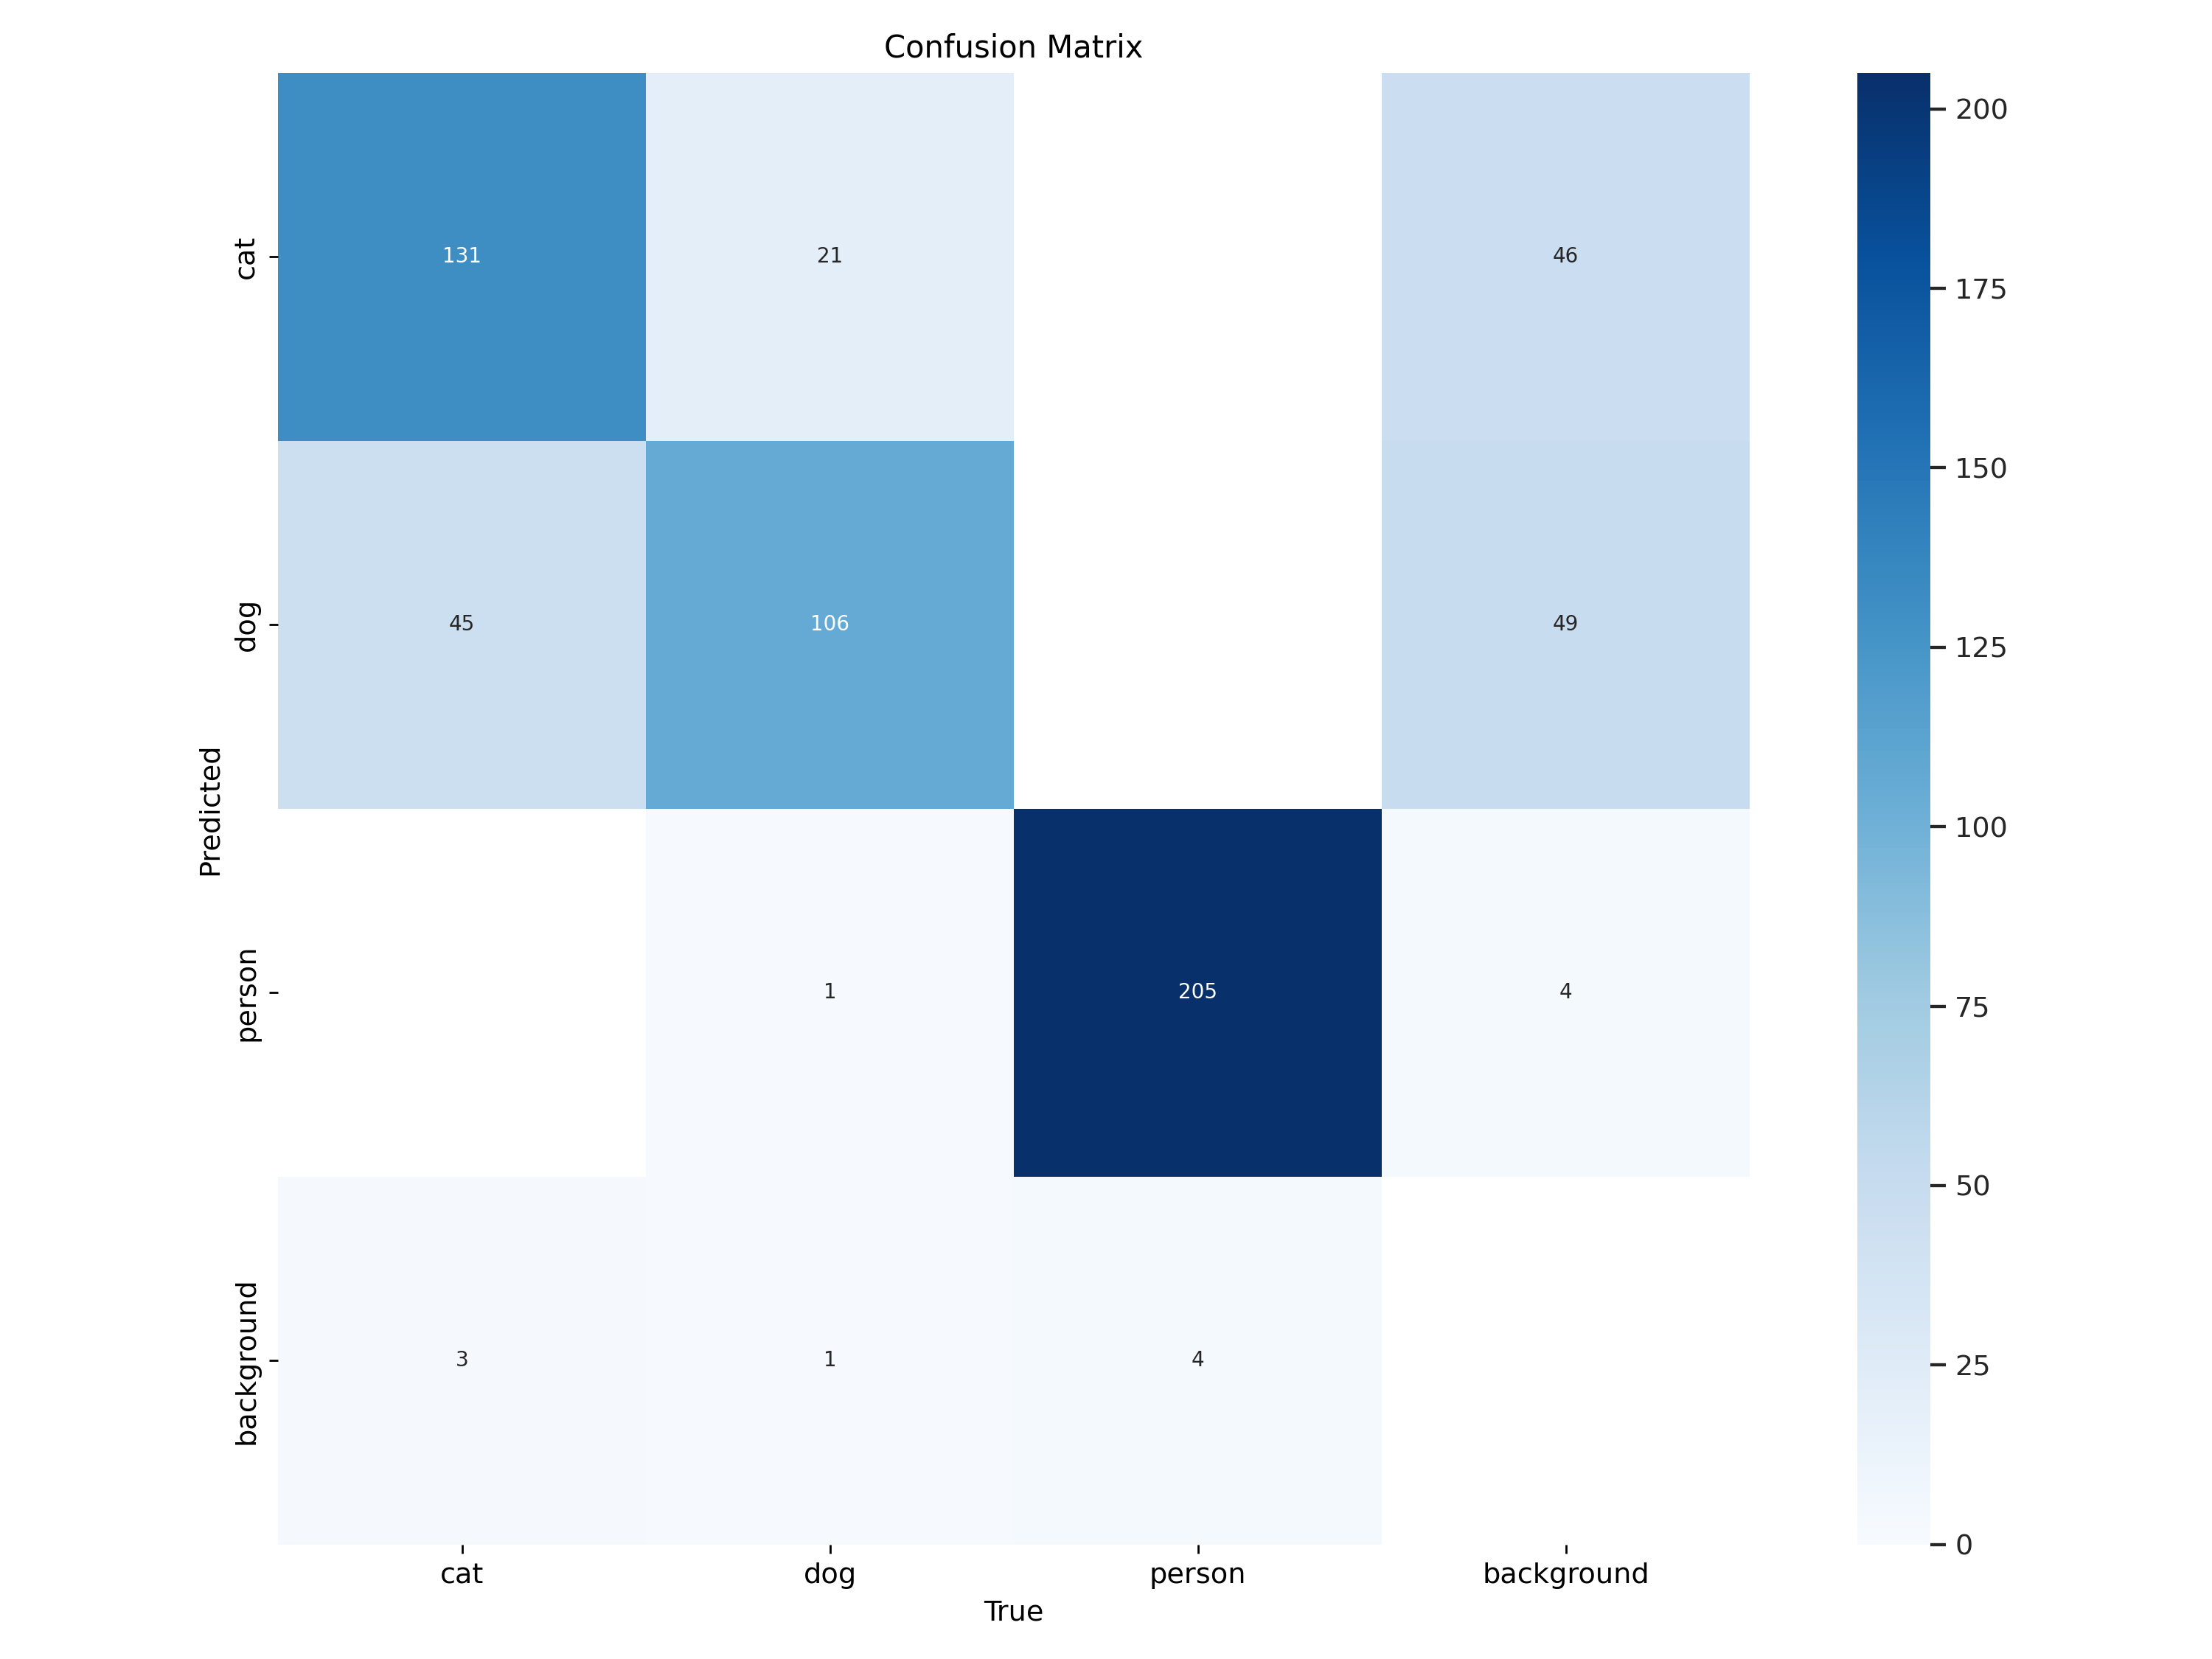

In [8]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


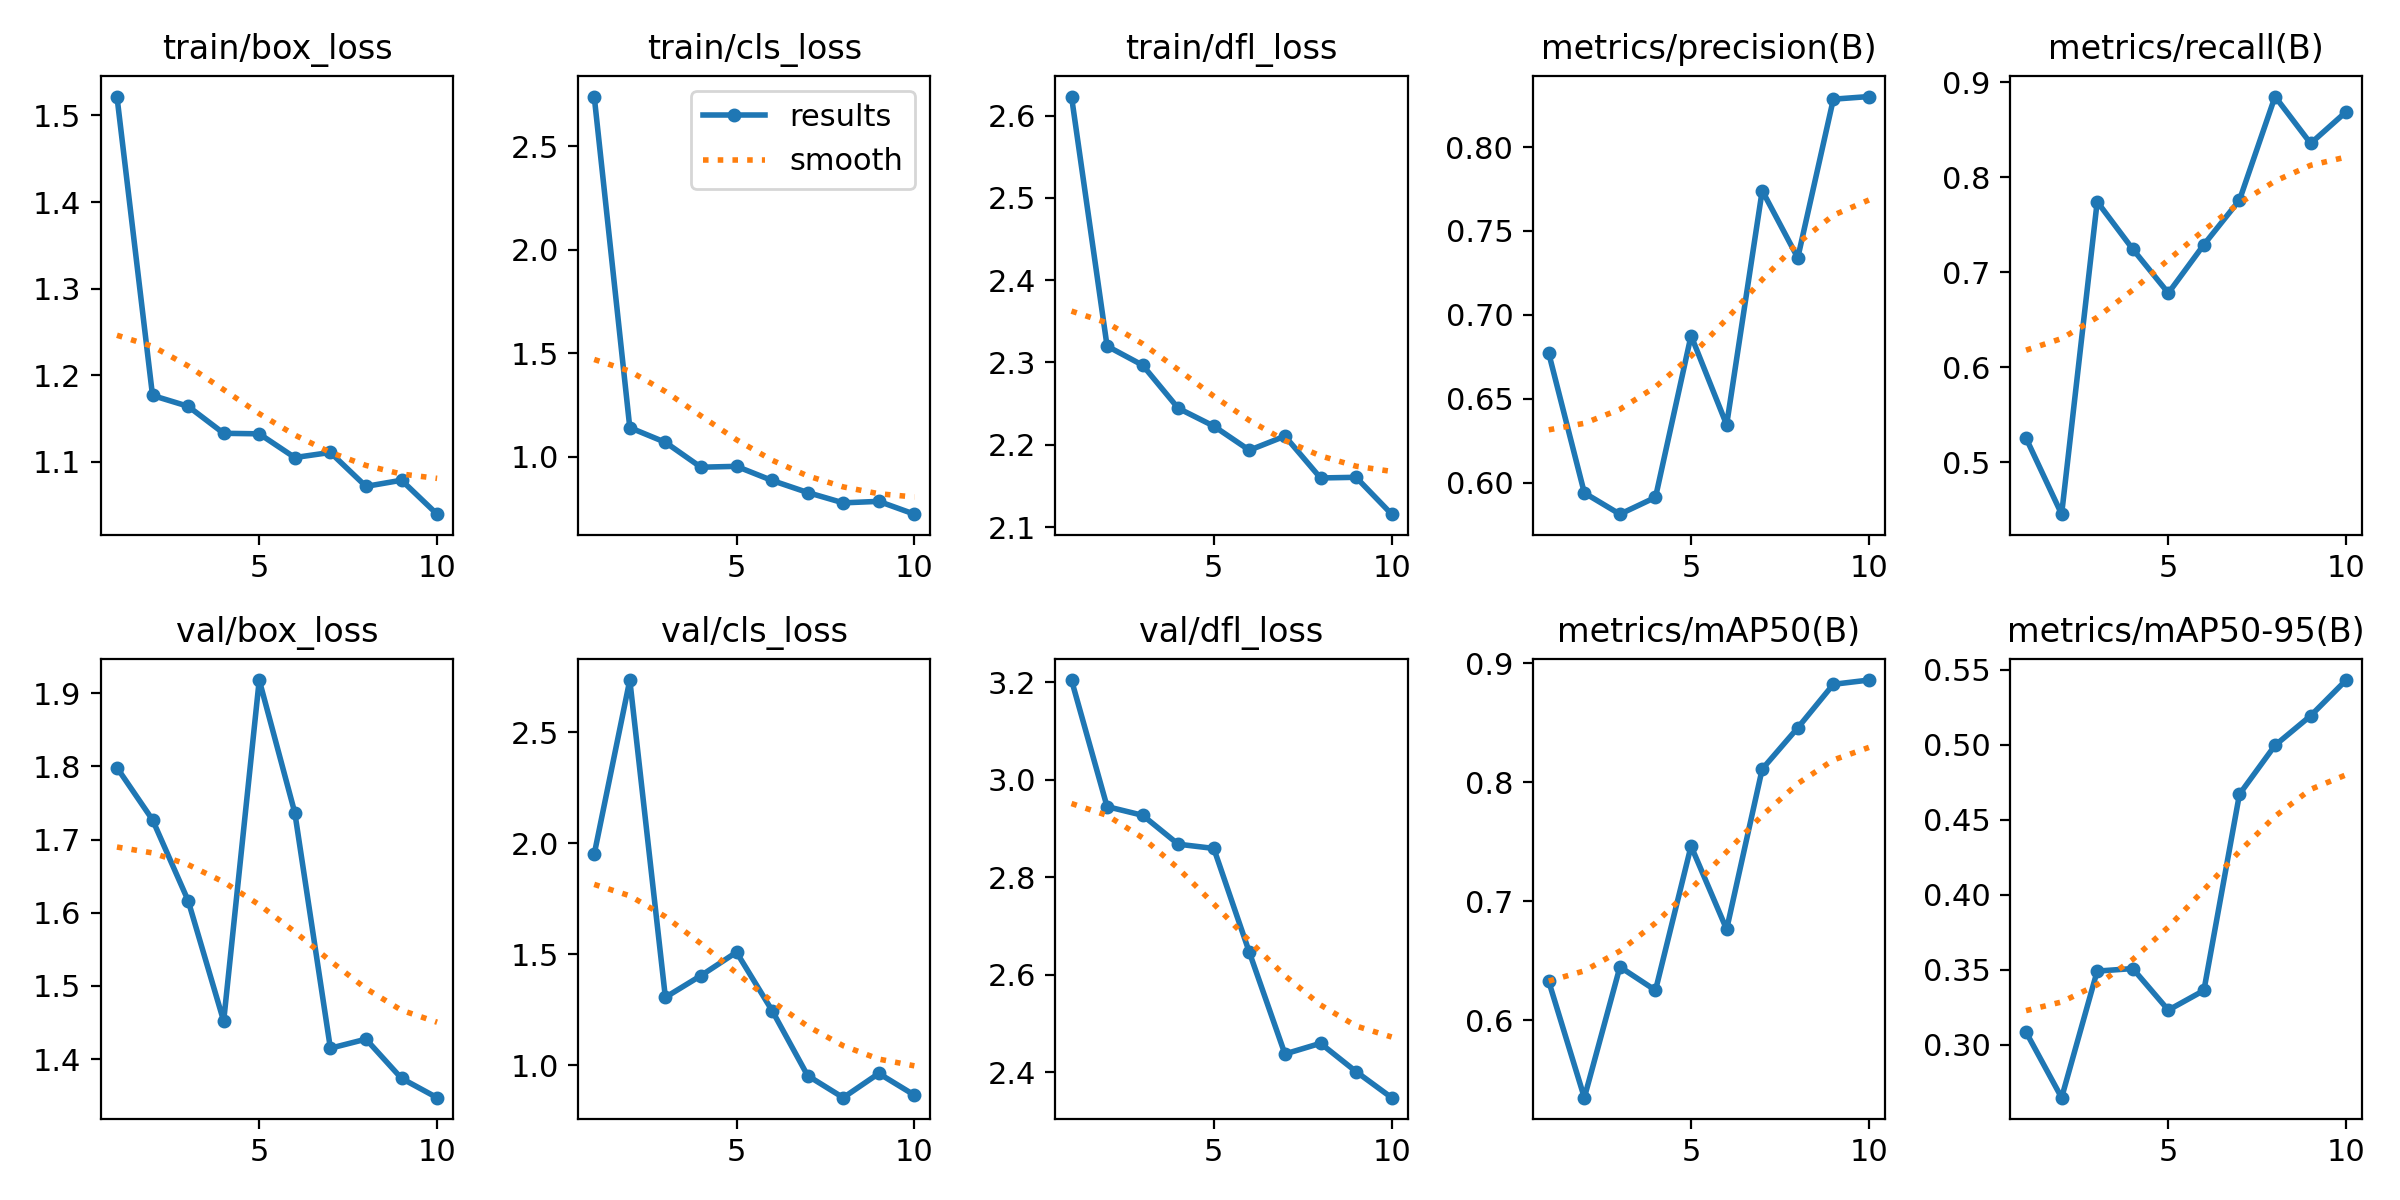

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


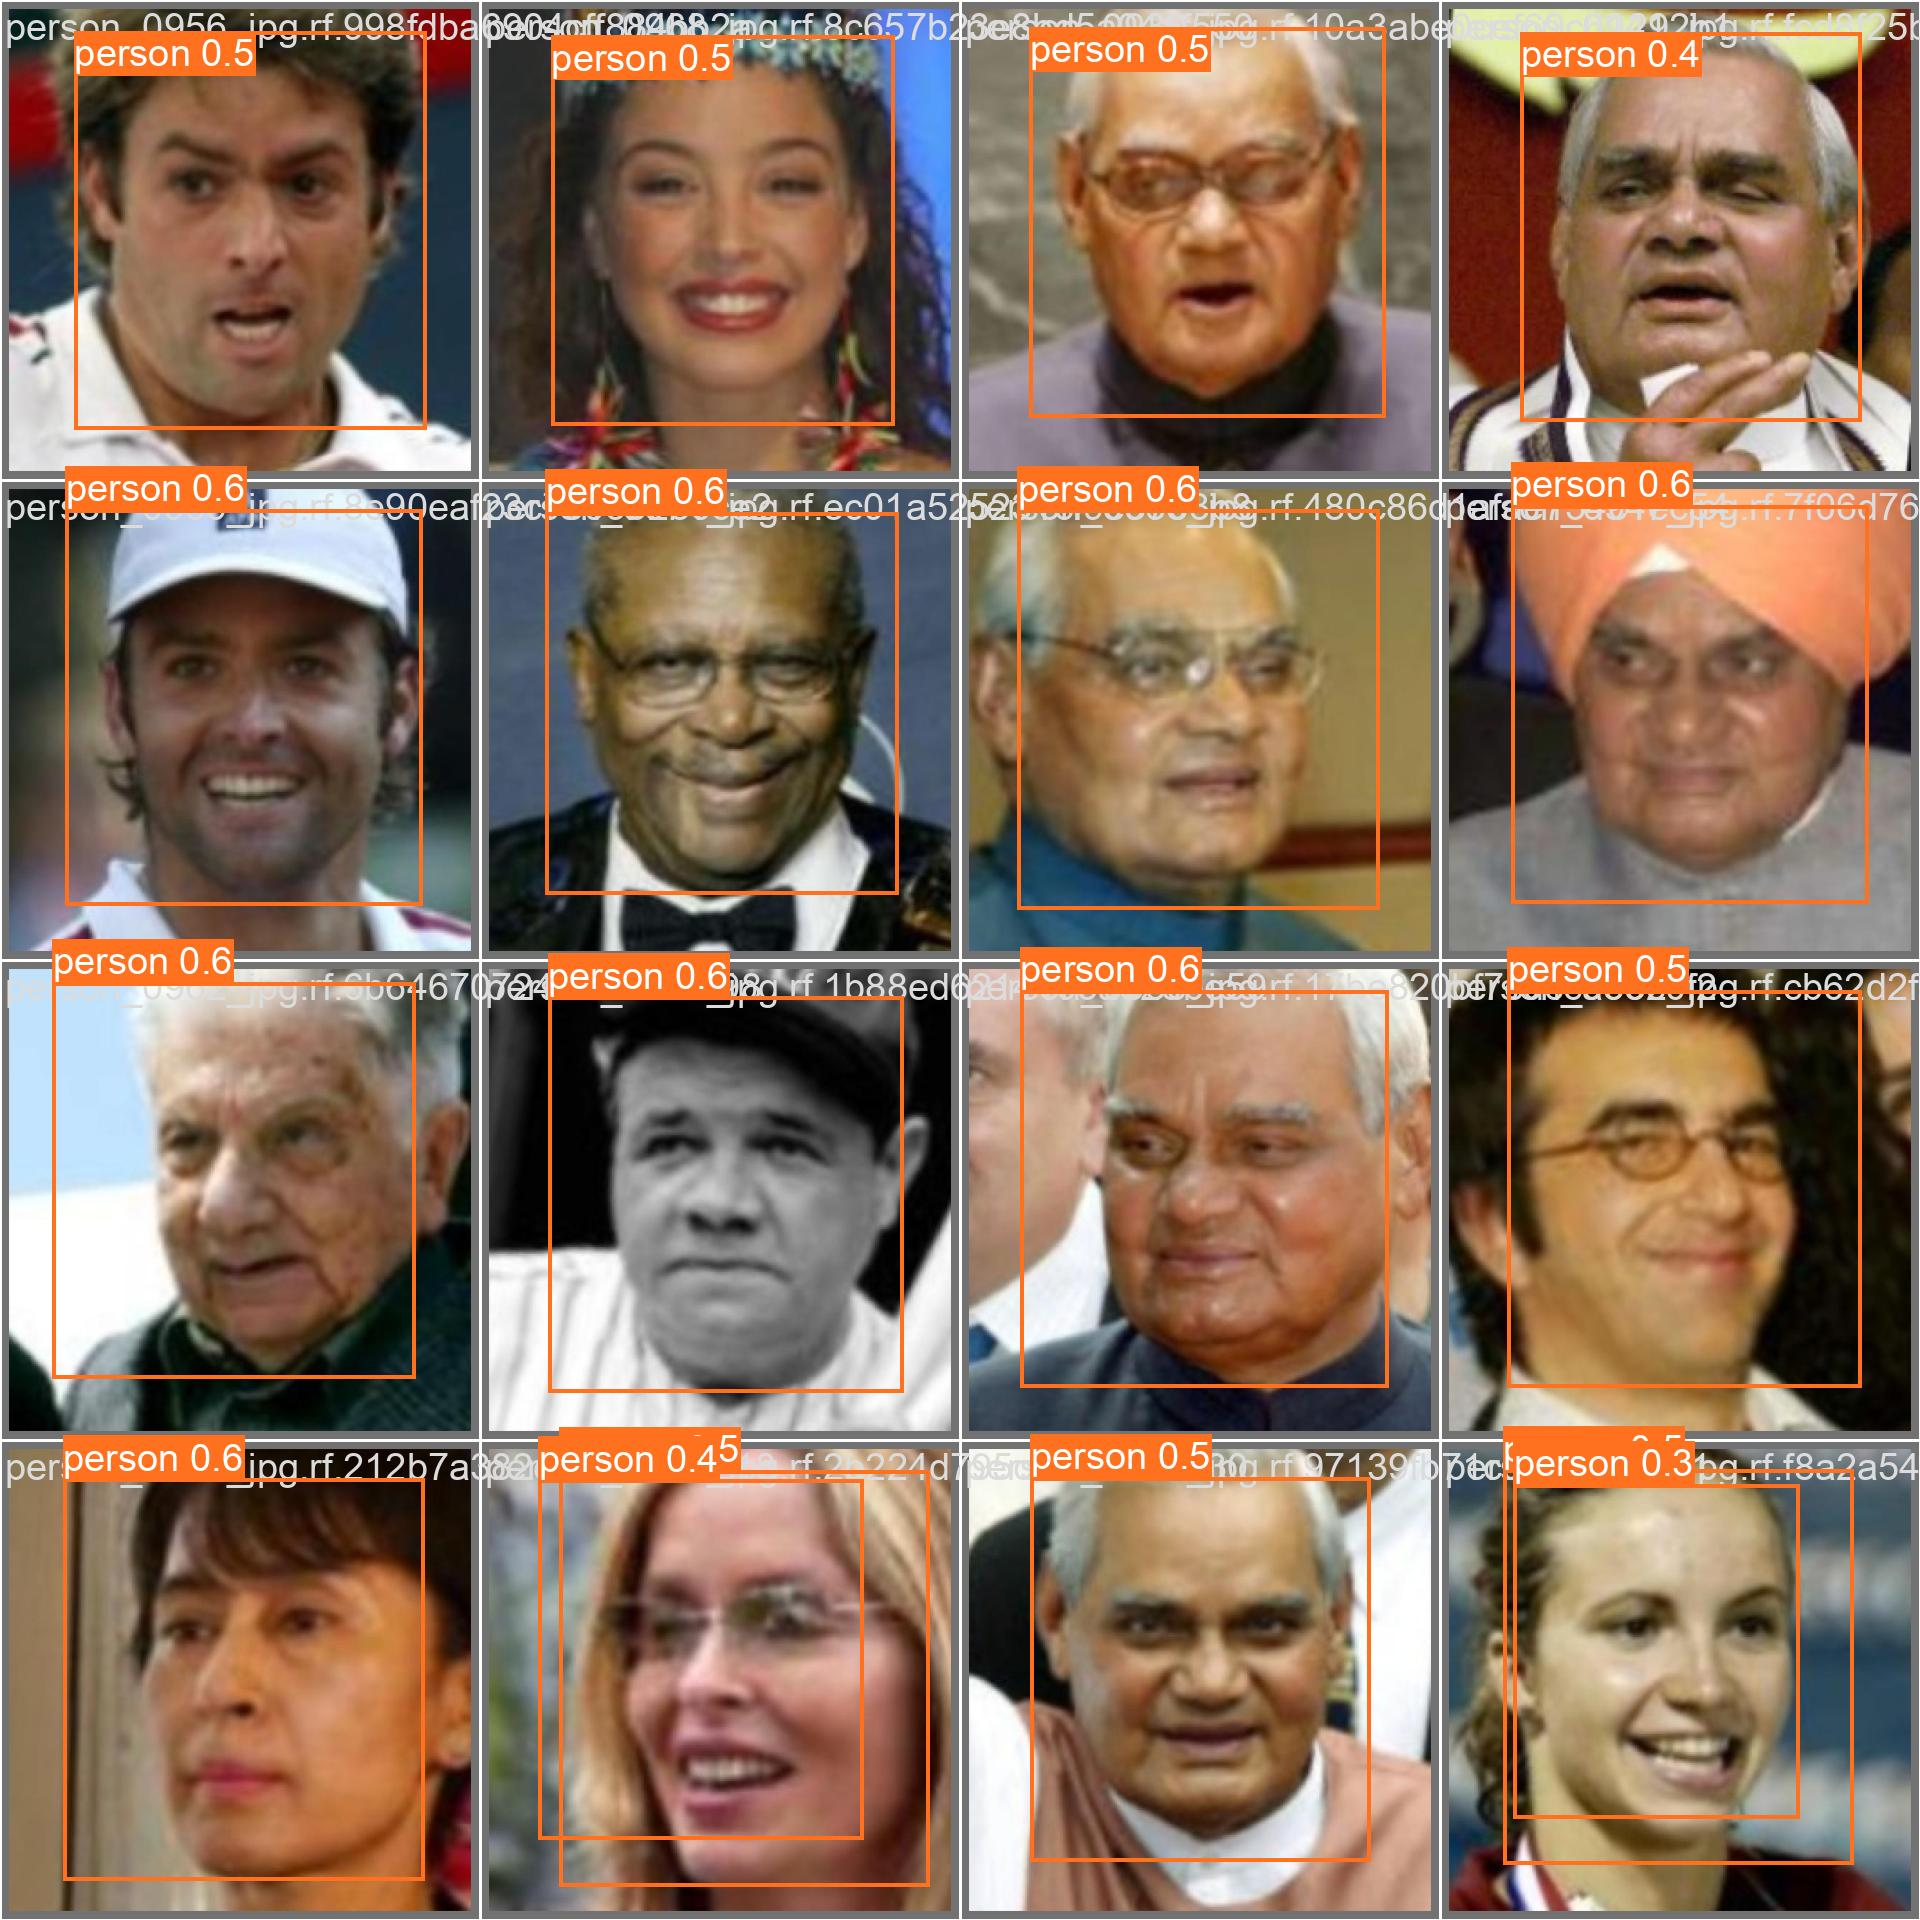

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cpu CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Image-Natural-1/valid/labels.cache... 515 images, 0 backgrounds, 0 corrupt: 100% 515/515 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/Image-Natural-1/valid/images/cat_0803_jpg.rf.afde2ec5dd9d015bfff5944650b5c612.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 33/33 [01:07<00:00,  2.03s/it]
                   all        515        517      0.813       0.89      0.886      0.543
                   cat        515        179      0.823      0.858      0.923      0.686
                   dog        515        129       0.67      0.868       0.81      0.504
                person        515        209      0.946      0.943      0.924      0.437
Speed: 1.9ms preprocess, 121.2ms inference, 0.0ms loss, 0.4ms p

In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cpu CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/257 /content/datasets/Image-Natural-1/test/images/cat_0000_jpg.rf.5fc6bf251c3ff207d730ae511a144ea2.jpg: 800x800 1 cat, 126.7ms
image 2/257 /content/datasets/Image-Natural-1/test/images/cat_0014_jpg.rf.47c86eeeca7fc7f3fec25e2ec5c384a8.jpg: 800x800 1 cat, 1 dog, 92.0ms
image 3/257 /content/datasets/Image-Natural-1/test/images/cat_0027_jpg.rf.67dbc17a8437fba75a9ee8197d19712f.jpg: 800x800 1 cat, 98.8ms
image 4/257 /content/datasets/Image-Natural-1/test/images/cat_0029_jpg.rf.cc663c41b7ebdd660ee7462bf0167a79.jpg: 800x800 1 cat, 100.4ms
image 5/257 /content/datasets/Image-Natural-1/test/images/cat_0065_jpg.rf.ae96781e580c54fda55991c57181236c.jpg: 800x800 1 cat, 93.5ms
image 6/257 /content/datasets/Image-Natural-1/test/images/cat_0072_jpg.rf.e8db6c7f0173a888d8eec89f0ca514b1.jpg: 800x800 1 cat, 78.4ms
image 7/257 /


image 1/1 /content/tes8.jpeg: 448x800 1 cat, 2 dogs, 67.5ms
Speed: 4.2ms preprocess, 67.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 800)


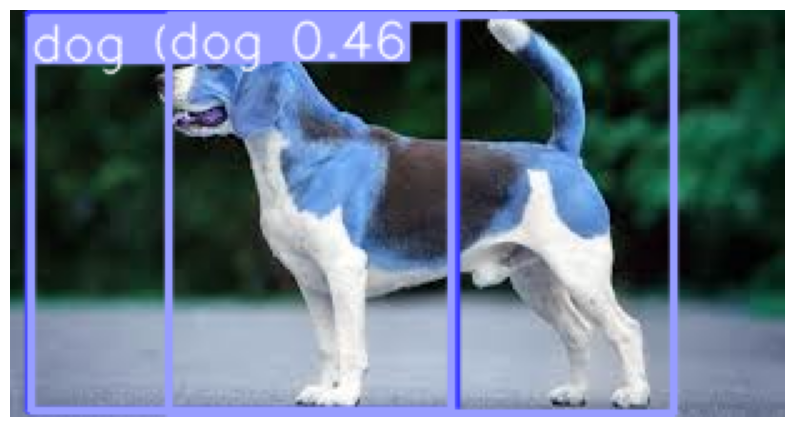

In [24]:
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO

# Path ke file model yang sudah dilatih
model_path = f'{HOME}/runs/detect/train2/weights/best.pt'

# Path ke gambar yang ingin diuji
image_path = 'tes8.jpeg'  # Ganti dengan nama file gambar spesifik

# Memuat model YOLO
model = YOLO(model_path)

# Melakukan prediksi pada satu gambar
results = model(image_path, conf=0.25)

# Menampilkan hasil prediksi
result_img = results[0].plot()  # Plot gambar dengan bounding box

# Menampilkan gambar hasil prediksi menggunakan matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(result_img)
plt.axis('off')  # Menghilangkan axis
plt.show()


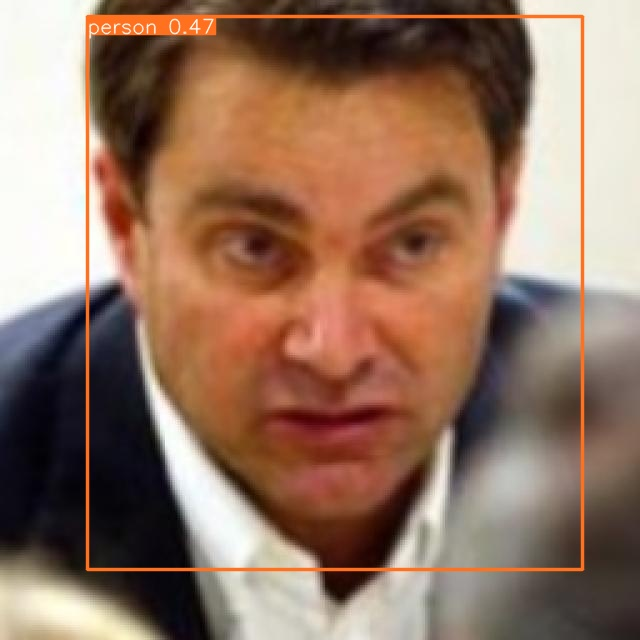

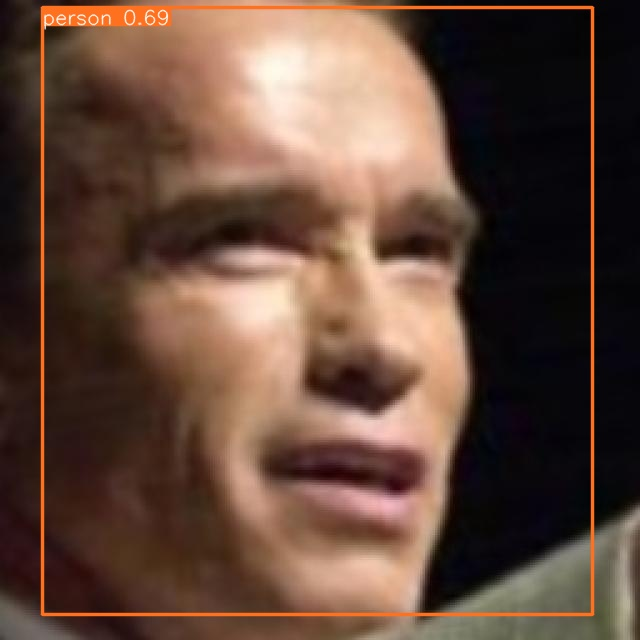

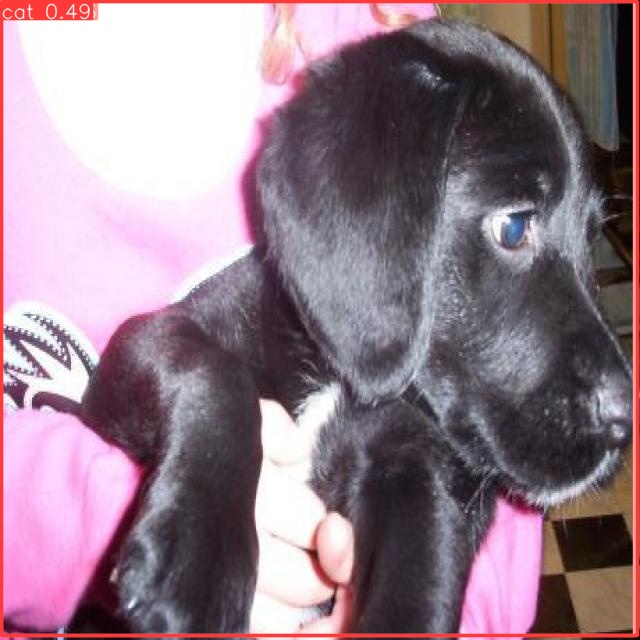

In [13]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")